In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
#importing some basics lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('Churn_Modelling.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
#divide the dataset into dependent and independent variables

x= data.iloc[:,3:13]
y= data.iloc[:,13]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
data['Geography'].nunique()

3

In [ ]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
#Feature engineering

geography= pd.get_dummies(x['Geography'], drop_first= True)
gender= pd.get_dummies(x['Gender'], drop_first= True)

In [ ]:
# concatenate these variables with dataframes

x= x.drop(['Geography', 'Gender'], axis=1)

In [ ]:
x.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
x= pd.concat([x,geography, gender], axis=1)

In [ ]:
x.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
5,645,44,8,113755.78,2,1,0,149756.71,False,True,True
6,822,50,7,0.00,2,1,1,10062.80,False,False,True
7,376,29,4,115046.74,4,1,0,119346.88,True,False,False
8,501,44,4,142051.07,2,0,1,74940.50,False,False,True
9,684,27,2,134603.88,1,1,1,71725.73,False,False,True


In [ ]:
x['Germany'] = x['Germany'].astype(int)
x['Spain'] = x['Spain'].astype(int)
x['Male'] = x['Male'].astype(int)

x.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1


In [ ]:
x.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
from re import X
#split the data in training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

For which all algo feature scaling is required

answer:  distance based problems will sureky require feature scaling

- gradient descent, optimizers are involved then feature scaling is used

ex= lr, logr, knn, k means, ann

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc= StandardScaler() #initialize
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

differebnce between fit_transform and transform.
why we use fit_transform with xtrain wheras transform with xtest?

ans: data leakage.

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 11)

ANN Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU, ReLU
from tensorflow.keras.layers import Dropout



1.   Sequential: helps us to do forward and backward propogation
2.   Dense: helps us to create neurons in the hidden layer, input and output layers.
3. Dropout: we use it to reduce the overfitting





In [ ]:
#initialize the ANN
model = Sequential()

In [ ]:
# adding the input layers

model.add(Dense(units=11,activation='relu'))

In [ ]:
# adding the first hidden layer

model.add(Dense(units=7,activation='relu'))

In [ ]:
#adding the second hidden layer

model.add(Dense(units=6,activation='relu'))

In [ ]:
# add the output layer

model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

by default adam optimizer uses learning rate of 0.1

In [ ]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
#early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history= model.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8701 - loss: 0.3120 - val_accuracy: 0.8501 - val_loss: 0.3735
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8704 - loss: 0.3117 - val_accuracy: 0.8501 - val_loss: 0.3734
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8728 - loss: 0.3033 - val_accuracy: 0.8504 - val_loss: 0.3786
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8804 - loss: 0.2984 - val_accuracy: 0.8436 - val_loss: 0.3813
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8798 - loss: 0.2966 - val_accuracy: 0.8482 - val_loss: 0.3740
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8858 - loss: 0.2873 - val_accuracy: 0.8497 - val_loss: 0.3744
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8697 - loss: 0.3077 - val_accuracy: 0.8474 - val_loss: 0.3783
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8722 - loss: 0.3115 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

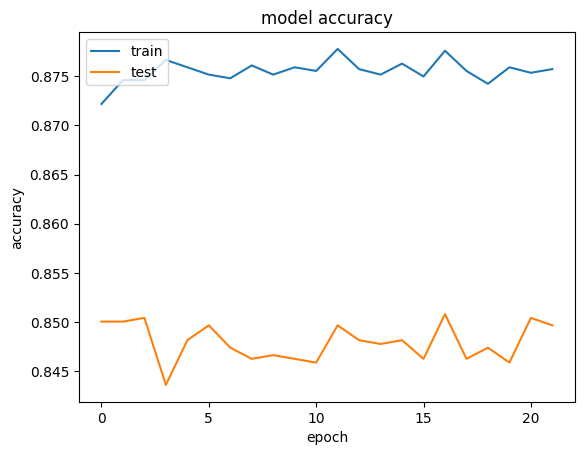

In [ ]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

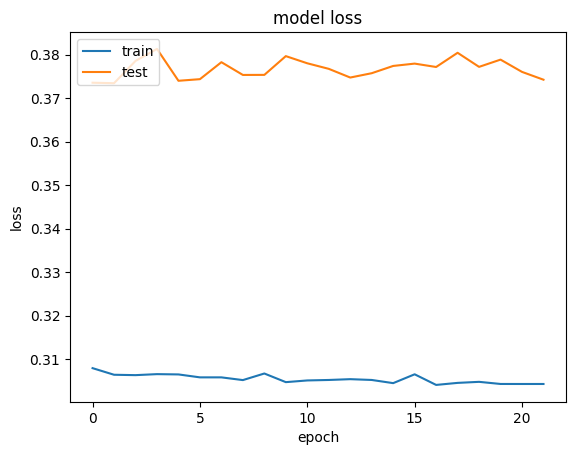

In [ ]:
#summarize history foer loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#prediction for the test data

y_pred= model.predict(X_test)
y_pred= (y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[1531,   64],
       [ 228,  177]])

In [ ]:
#calculate 6the accuracy

from sklearn.metrics import accuracy_score
score= accuracy_score(y_pred, y_test)
score

0.854

In [ ]:
#get the weights

model.get_weights()

[array([[-0.2978723 , -0.12181158,  0.13895793,  0.09821176, -0.0250841 ,
         -0.7536791 ,  0.13768466,  0.20536019,  0.04749982,  0.35126147,
         -0.05937142],
        [-0.60420275, -0.4480183 , -0.4593865 , -0.58307606, -0.16228014,
          0.39224854, -0.1234106 ,  0.5739215 , -0.81113505, -0.59013397,
         -0.2710228 ],
        [-0.0727587 ,  0.09491079,  0.46611667,  0.88877374, -0.15966634,
         -0.4362622 ,  0.27743348, -0.06407411,  0.04983149, -0.05417895,
         -0.43051898],
        [-0.65103525,  0.4363366 , -0.8654257 , -0.7402263 , -0.24917102,
         -0.72631365,  0.1862619 , -0.1859419 , -0.01409994, -0.18281811,
          0.31118864],
        [-0.2413939 , -0.58921254, -0.74622905,  0.43832928, -1.1797366 ,
          0.23419464,  0.9895444 , -0.17849995, -0.10304764,  0.48265505,
          0.82408214],
        [-0.3122414 ,  0.25609475,  0.25658697, -0.26358524,  0.13096234,
          0.16917978,  0.18065153,  0.31039467,  0.2215443 , -0.2020178